In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

Change `json_path` here

In [2]:
json_path="./scalingGraph.json"

In [8]:
with open(json_path) as f:
    data = json.load(f)
timings = []
for d in data["datapoints"]:
    s = d["setting"]
    comp = list(map(lambda x: (x["computationTime"]),
                   sorted(d["data"]["workers"], key=lambda x: x["rank"])))
    comp = max(comp)
    mpi = list(map(lambda x: (x["mpiTime"]),
                   sorted(d["data"]["workers"], key=lambda x: x["rank"])))
    mpi = max(mpi)
    timings.append((comp, mpi, s["nodeCount"]))


print(len(timings), timings)

20 [(112947472, 437463, 2), (86905767, 2198746, 4), (78449806, 15541560, 6), (56323385, 6866612, 8), (59353368, 23385577, 10), (50845865, 5880008, 12), (39842227, 6333247, 14), (36293879, 6143928, 16), (35515185, 15535714, 18), (36269501, 7179025, 20), (20629578, 7111682, 22), (24823994, 7091540, 24), (20616056, 26449197, 26), (24083707, 6649373, 28), (19874740, 8289929, 30), (24179422, 7012762, 32), (20633102, 13843912, 34), (16397577, 6989272, 36), (20630870, 17910987, 38), (17827285, 6960380, 40)]


In [4]:
cpT, mpiT, nodeCnt = zip(*timings)

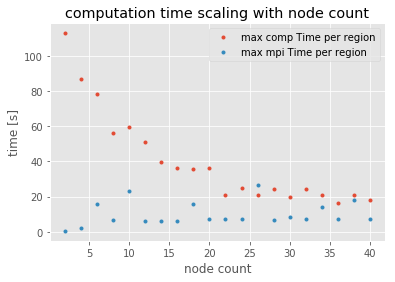

In [11]:
plt.style.use('ggplot')

x = np.asarray(nodeCnt)
#  time in s
cp = np.asarray(cpT) / 1e6
mpi = np.asarray(mpiT) / 1e6


fig, host = plt.subplots()
# par1 = host.twinx()

host.plot(x, cp, label="max comp Time per region", lw=0, marker=".")
host.plot(x, mpi, label="max mpi Time per region", lw=0, marker=".")

host.set(xlabel='node count', ylabel='time [s]',
    title='computation time scaling with node count'
)
# par1.set(ylabel='max mpi time [s]')

host.legend()
host.grid(True)
#plt.axis([0, None, 0, 0.04])

plt.show()